In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib
import time
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [10]:
# Link to Webiste

link = 'https://www.flipkart.com/apple-iphone-se-white-64-gb/product-reviews/itma00a19e11c81b?pid=MOBFWQ6BGWDVGF3E&lid=LSTMOBFWQ6BGWDVGF3EMJEIV6&marketplace=FLIPKART&page='

In [11]:
# Number of pages to scrape

number_of_pages = 200

In [12]:
# Adding all the pages URL into one

pages = []
for i in range(1, number_of_pages+1):
    url = link+str(i)
    pages.append(url)

In [13]:
len(pages)

200

In [32]:
reviewlist = []
for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')

    reviews = soup.find_all('div', attrs={'class' : 'col _2wzgFH K0kLPL'})

    for item in reviews:
        sub_row = item.find_all('div',attrs={'class':'row'})
        review = {
        'rating' : sub_row[0].find('div').text,
        'summary' : sub_row[0].find('p').text,
        'review' :sub_row[1].find('div').text
        }
        reviewlist.append(review)

In [33]:
len(reviewlist)

2000

In [34]:
df = pd.DataFrame(reviewlist)
df

,rating,summary,review
0,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
1,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
2,4,Worth the money,Can be surely preferred as your first iphone V...
3,5,Super!,Great camera for pics and videos Battery life ...
4,4,Value-for-money,This is the first iPhone I hv bought .. It’s b...
...,...,...,...
1995,5,Simply awesome,Awesome phoneREAD MORE
1996,4,Very Good,The first apple phone after 10 long years of a...
1997,5,Super!,best camera n performanceREAD MORE
1998,3,Good,"Having serious issue with Battery, it drains a..."


In [36]:
df.shape

(2000, 3)

In [57]:
count = df.groupby(['rating']).count().reset_index()

In [59]:
count

,rating,summary,review
0,1,149,149
1,2,43,43
2,3,132,132
3,4,373,373
4,5,1303,1303


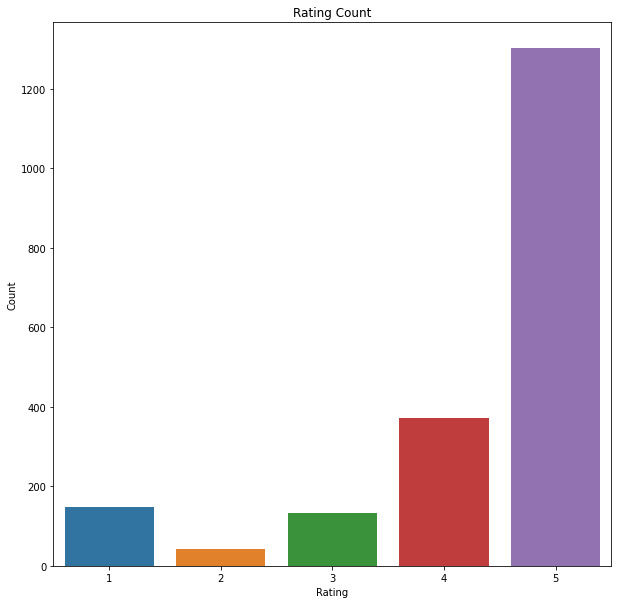

In [61]:
plt.figure(figsize = (10,10))
fig =sns.barplot(x = 'rating',y = 'review',data = count)
fig.set(xlabel='Rating', ylabel='Count', title= 'Rating Count');

In [72]:
df["rating"] = df["rating"].astype(int)

In [81]:
wc = WordCloud(max_words = 200, regexp = "[A-z]+", width = 800, height = 400, stopwords = STOPWORDS, random_state = 40)

ONE STAR

In [73]:
one_star = df[df["rating"]==1]

In [79]:
reviews = ' '.join(one_star['review'])

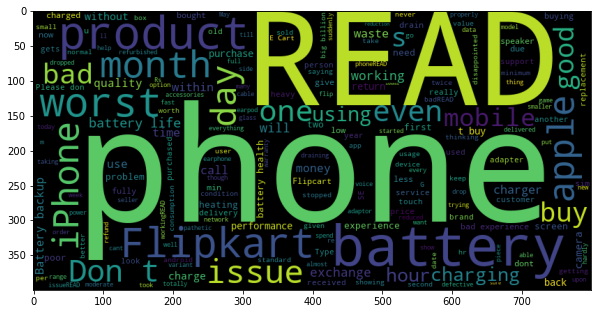

In [82]:
# One Star Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(reviews))
plt.show()

TWO STAR

In [75]:
two_star = df[df["rating"]==2]

In [89]:
reviews = ' '.join(two_star['review'])

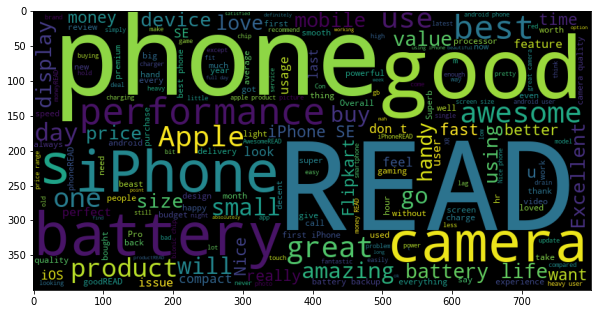

In [103]:
# Two Star Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(reviews))
plt.show()

THREE STAR

In [91]:
three_star = df[df["rating"]==3]

In [92]:
reviews = ' '.join(three_star['review'])

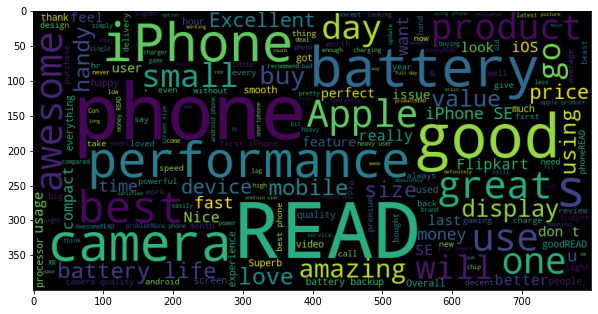

In [101]:
# Three Star Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(reviews))
plt.show()

FOUR STAR

In [94]:
four_star = df[df["rating"]==4]

In [95]:
reviews = ' '.join(four_star['review'])

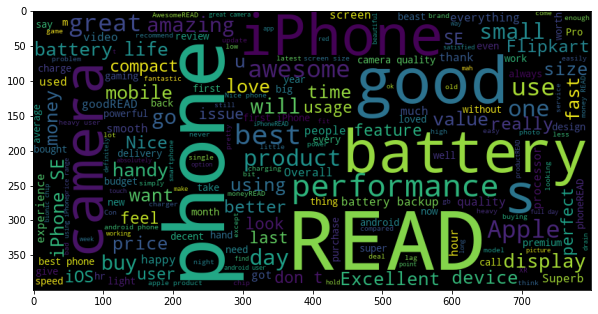

In [100]:
# Four Star Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(reviews))
plt.show()

FIVE STAR

In [78]:
five_star = df[df["rating"]==5]

In [97]:
reviews = ' '.join(five_star['review'])

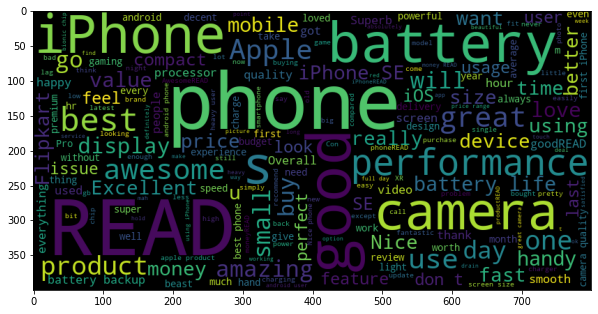

In [99]:
# Five Star Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(reviews))
plt.show()

SUMMARY WORDCLOUD

In [105]:
summary = ' '.join(df['summary'])

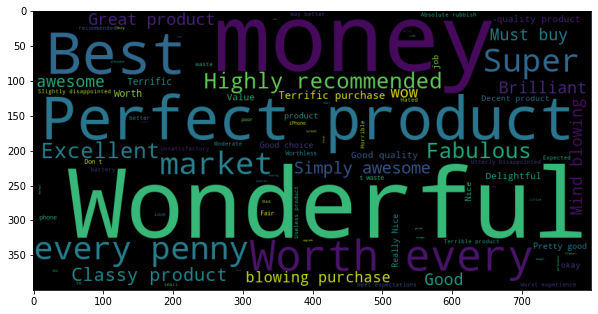

In [106]:
# Summary WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(summary))
plt.show()